In [251]:


import qiskit
import numpy as np
from qiskit import(
    IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister, execute,
    QuantumCircuit,
    execute,
    Aer)
from qiskit.visualization import plot_histogram, plot_state_city


In [243]:
def increment_gate(circuit, qpos, qcoin):
    n = len(qpos)
    for i in range(n):
        circuit.mct([qcoin[0]]+qpos[i+1:], qpos[i], None, mode='noancilla')
        circuit.barrier()

def decrement_gate(circuit, qpos, qcoin):
    n = len(qpos)
    for i in range(n):
        if i+1 < n:
            circuit.x(qpos[i+1:])
        circuit.x(qcoin[0])
        circuit.mct([qcoin[0]]+qpos[i+1:], qpos[i], None, mode='noancilla')
        circuit.barrier()

def step(circuit, qpos, qcoin):
    circuit.h(qcoin)
#     circuit.x(qcoin)
    increment_gate(circuit, qpos, qcoin)
    decrement_gate(circuit, qpos, qcoin)


In [245]:
n=2

simulator = Aer.get_backend('qasm_simulator')

qpos = QuantumRegister(n,'qc')
qcoin = QuantumRegister(1,'qanc')
cpos = ClassicalRegister(n,'cr')

circuit = QuantumCircuit(qpos, qcoin, cpos)

# increment_gate(circuit, qpos, )

# # Map the quantum measurement to the classical bits
circuit.measure(qpos,cpos)

# # Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)

# # Grab results from the job
result = job.result()

# # Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)

# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 1000}


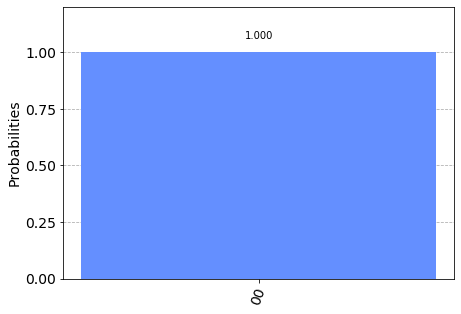

In [246]:
# Plot a histogram


plot_histogram(counts)

In [76]:
l = [0,1,2,3]

SyntaxError: invalid syntax (<ipython-input-77-2e47622e4956>, line 1)